In [12]:
## Load in Python Libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
from IPython.display import Image
%matplotlib inline

## Loading in top map and overlayed ortho photo

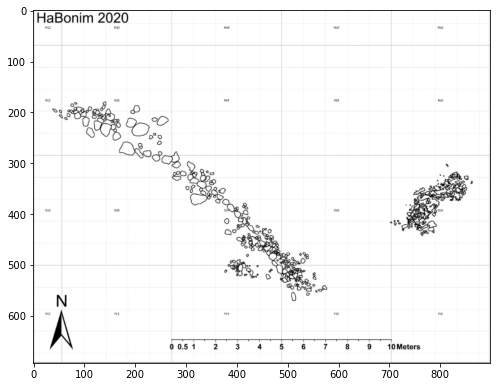

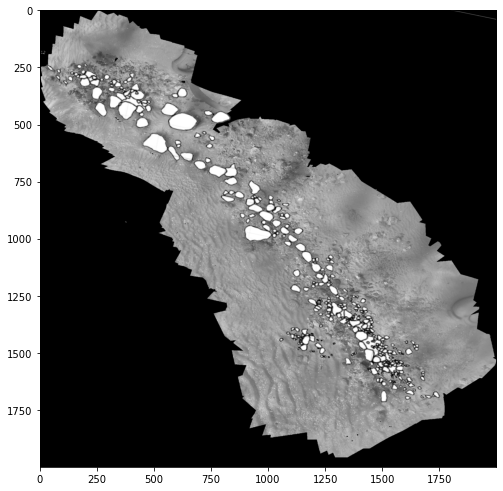

In [83]:
## load in ortho and top map

topDown4 = cv2.imread("top_plan.png", cv2.IMREAD_GRAYSCALE)
topplan = cv2.imread("croppedtopplan.png", cv2.IMREAD_GRAYSCALE)
topDown5 = cv2.imread("top_downOverlay.tif", cv2.IMREAD_GRAYSCALE)
coloredimage = cv2.imread("ortho1.tif")
## plot images

plt.figure(figsize=[18,15])
plt.subplot(121); plt.imshow(topDown4, cmap="gray");
plt.figure(figsize=[18,15])
plt.subplot(121); plt.imshow(topDown5, cmap="gray");

## Results from Image Thresholding

(2000, 2000)


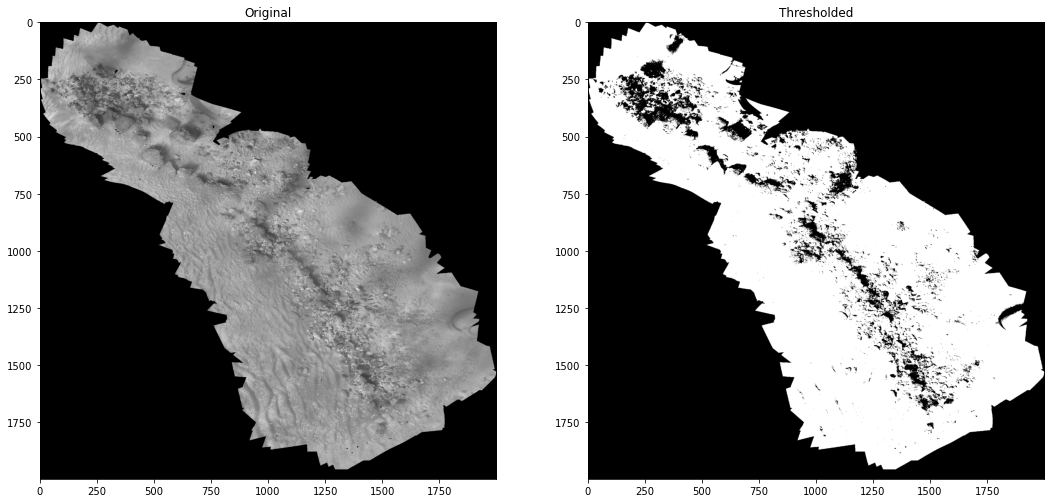

In [77]:
## loading in ortho image

topDown = cv2.imread("ortho1.tif", cv2.IMREAD_GRAYSCALE)

## results from image thresholding

retval, img_thresh = cv2.threshold(topDown, 115, 255, cv2.THRESH_BINARY)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(121); plt.imshow(topDown, cmap="gray");         plt.title("Original");
plt.subplot(122); plt.imshow(img_thresh, cmap="gray");       plt.title("Thresholded");

print(img_thresh.shape)

## Results from global and adaptive thresholding

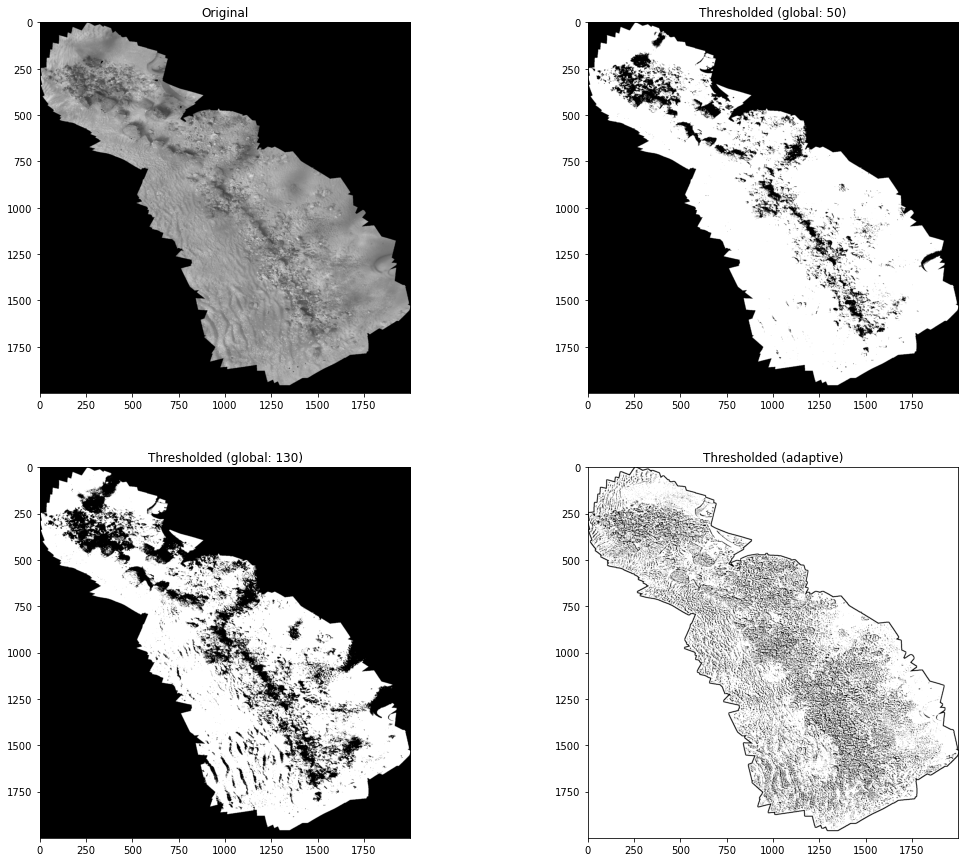

In [17]:
topDown2 = cv2.imread("ortho1.tif", cv2.IMREAD_GRAYSCALE)

# Perform global thresholding
retval, img_thresh_gbl_1 = cv2.threshold(topDown2,115, 255, cv2.THRESH_BINARY)

# Perform global thresholding
retval, img_thresh_gbl_2 = cv2.threshold(topDown2,130, 255, cv2.THRESH_BINARY)

# Perform adaptive thresholding
img_thresh_adp = cv2.adaptiveThreshold(topDown2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(topDown2,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)");

## Results from canny edge detection

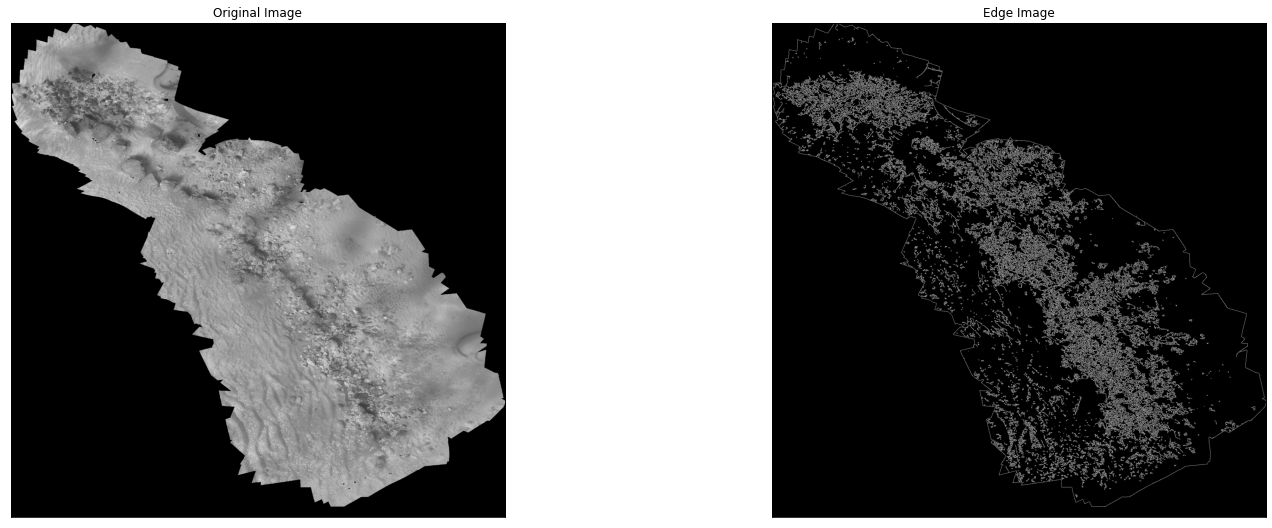

In [18]:
## load in image
topDown3 = cv2.imread("ortho1.tif", cv2.IMREAD_GRAYSCALE)

# canny edge detection
edges = cv.Canny(topDown3,50,200)

# plot images


Number of Contours found = 16


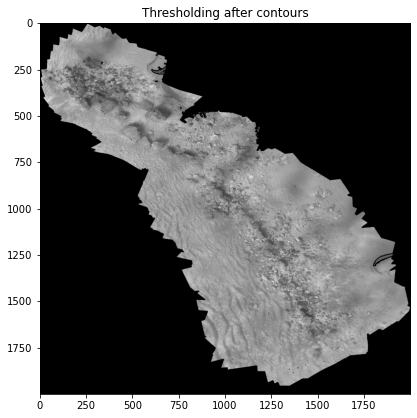

In [78]:
image = cv2.imread("ortho1.tif", cv2.IMREAD_GRAYSCALE)
# Find Canny edges
retval, img_thresh = cv2.threshold(image, 110, 255, cv2.THRESH_BINARY)
  

  
# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
cv2.imshow('Thresholded edges After Contouring', img_thresh)
  
print("Number of Contours found = " + str(len(contours)))
  
# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)

plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(image, cmap="gray");  plt.title("Thresholding after contours");

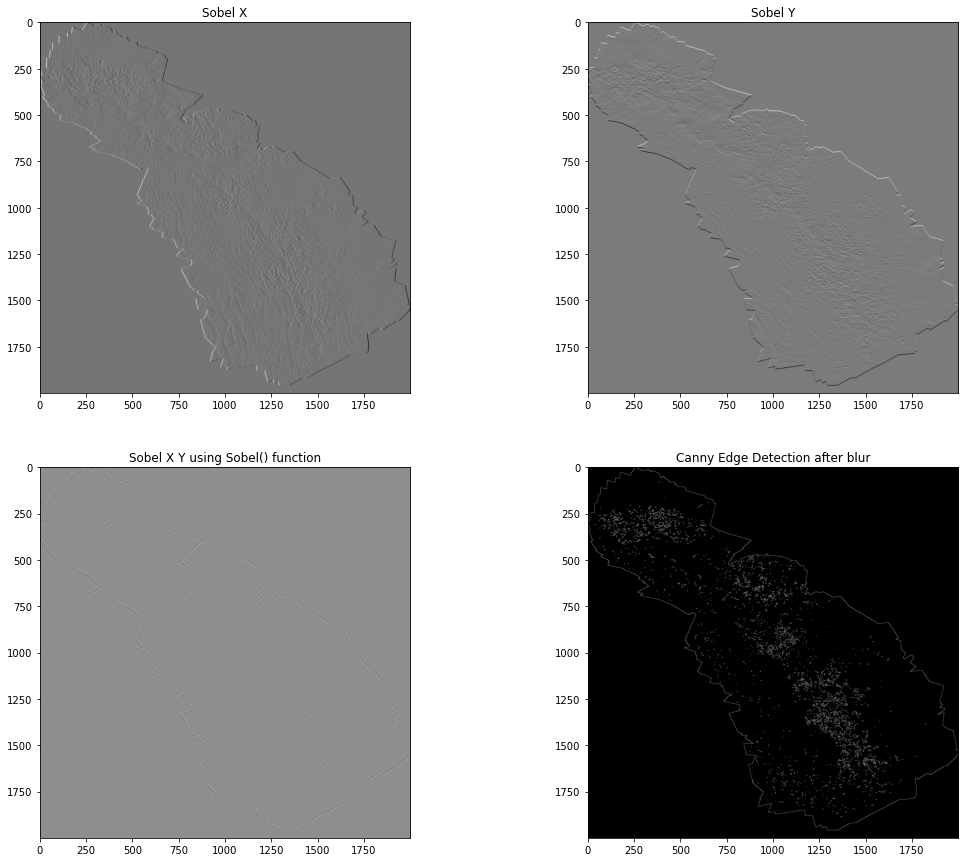

In [7]:
img = cv2.imread('ortho1.tif')


img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur the image for better edge detection

img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis

sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis

sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

# Canny Edge Detection

edges = cv2.Canny(image=img_blur, threshold1=150, threshold2=200) # Canny Edge Detection

    
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(sobelx,        cmap="gray");  plt.title('Sobel X');
plt.subplot(222); plt.imshow(sobely,cmap="gray");  plt.title('Sobel Y');
plt.subplot(223); plt.imshow(sobelxy,cmap="gray");  plt.title('Sobel X Y using Sobel() function');
plt.subplot(224); plt.imshow(edges,  cmap="gray");  plt.title("Canny Edge Detection after blur");

## Image manipulation on close up photos

In [8]:
mace = cv2.imread("mace.jpg", cv2.IMREAD_GRAYSCALE)

(3000, 4000)


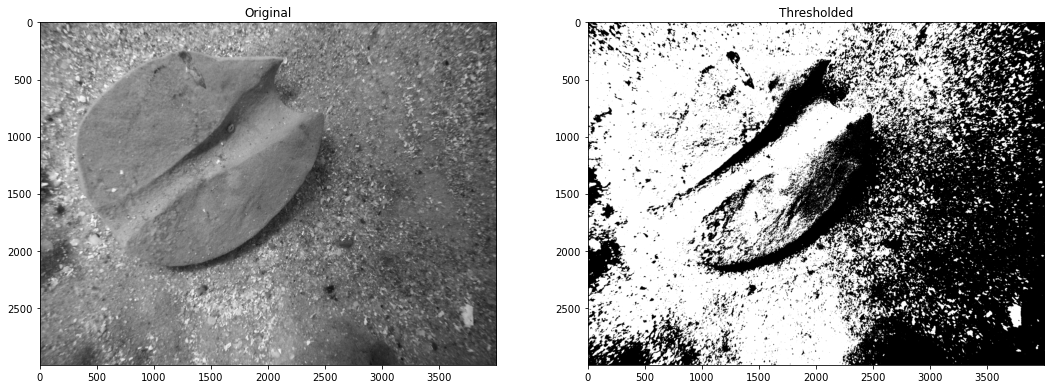

In [79]:
retval, img_thresh = cv2.threshold(mace, 135, 255, cv2.THRESH_BINARY)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(121); plt.imshow(mace, cmap="gray");         plt.title("Original");
plt.subplot(122); plt.imshow(img_thresh, cmap="gray");       plt.title("Thresholded");

print(img_thresh.shape)

## Using masking and overlay

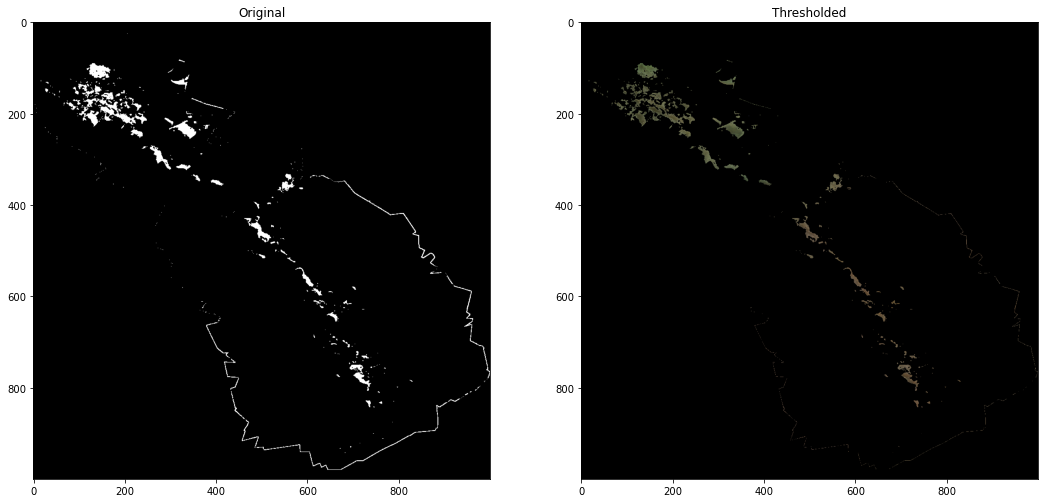

In [35]:
## read in ortho1.tif

img_orig = cv2.imread("ortho1.tif")
scale = 0.5


## Scale image and apply gaussian blur
H, W, _ = img_orig.shape
img = cv2.resize(img_orig, (int(W*scale), int(H*scale)))
blurred = cv2.GaussianBlur(img, (3, 3), 0)


# HSV values I found worked best
low = (73, 63, 0)
high = (255, 255, 119)


## convert to HSV color space
hsv_img = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)


## thresholding image
mask = cv2.inRange(hsv_img, low, high)
mask_resized = cv2.resize(mask, (W, H))



overlayed = cv2.bitwise_and(img_orig, img_orig, mask=mask_resized)

overlayed_show = cv2.bitwise_and(img, img, mask=mask)





# Show the images
plt.figure(figsize=[18,15])
plt.subplot(121); plt.imshow(mask, cmap="gray");         plt.title("Original");
plt.subplot(122); plt.imshow(overlayed_show, cmap="gray");       plt.title("Thresholded");

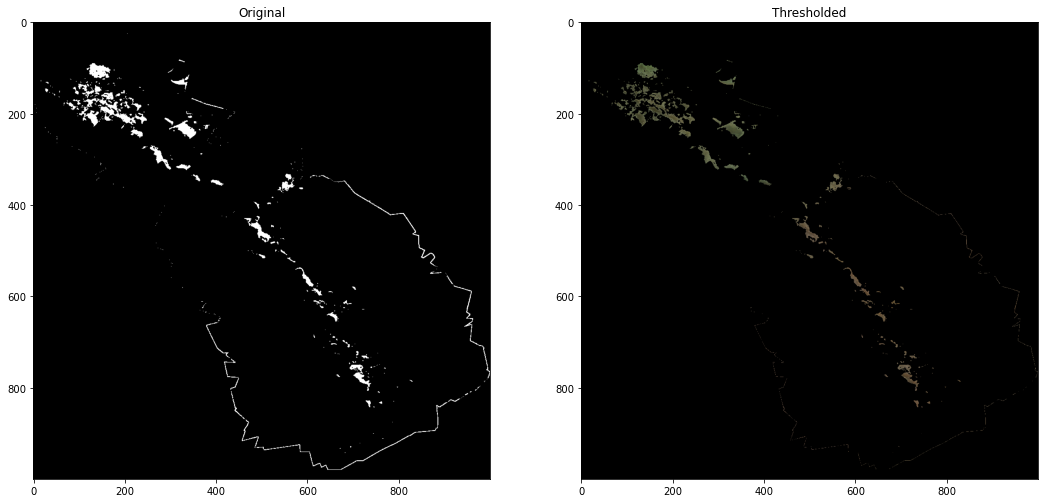

In [36]:
## read in ortho1.tif

img_orig = cv2.imread("ortho1.tif")
scale = 0.5


## Scale image and apply gaussian blur
H, W, _ = img_orig.shape
img = cv2.resize(img_orig, (int(W*scale), int(H*scale)))
blurred = cv2.GaussianBlur(img, (3, 3), 0)


# HSV values I found worked best
low = (0,0,0)
high = (255,255,121)


## convert to HSV color space
hsv_img = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)


## thresholding image
mask2 = cv2.inRange(hsv_img, low, high)
mask_resized2 = cv2.resize(mask2, (W, H))


overlayed2 = cv2.bitwise_and(img_orig, img_orig, mask=mask_resized2)

overlayed_show2 = cv2.bitwise_and(img, img, mask=mask2)





# Show the images
plt.figure(figsize=[18,15])
plt.subplot(121); plt.imshow(mask, cmap="gray");         plt.title("Original");
plt.subplot(122); plt.imshow(overlayed_show, cmap="gray");       plt.title("Thresholded");

## Drawing Circles around significant points and transposing it to a top down map

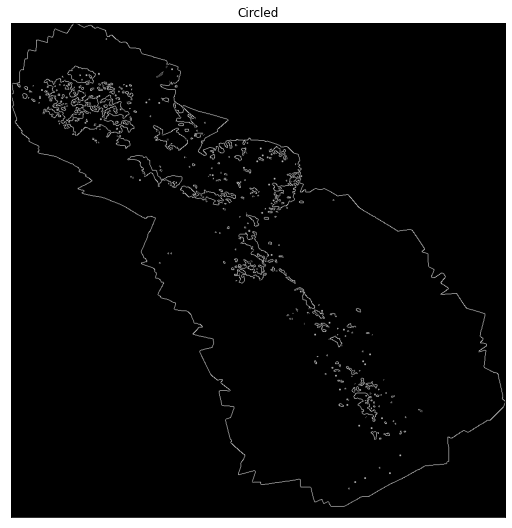

In [61]:
## pulling edges from edited photo

edges2 = cv2.Canny(mask2,50,200)

plt.figure(figsize=[25,20])
plt.subplot(222),plt.imshow(edges2,cmap = 'gray')
plt.title('Circled'), plt.xticks([]), plt.yticks([])
plt.show()

Text(0.5, 1.0, 'Orginal Photo Colored')

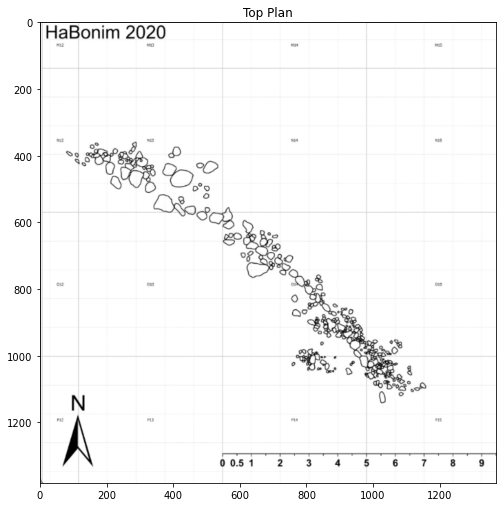

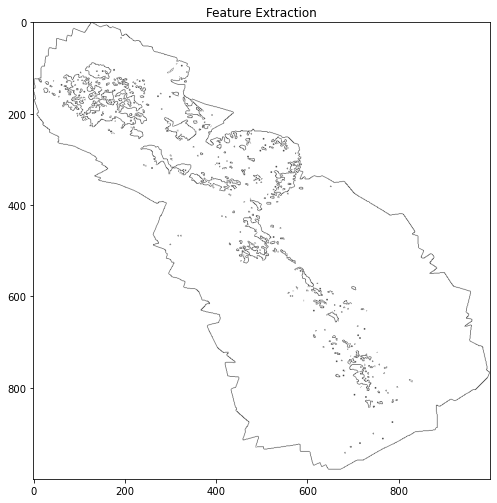

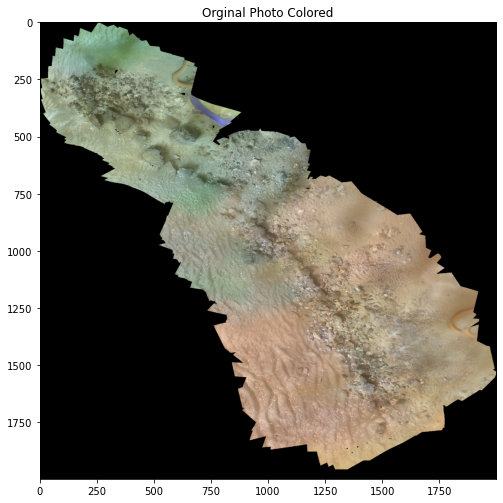

In [85]:
## inverted

imagem = cv2.bitwise_not(edges2)

plt.figure(figsize=[18,15])
plt.subplot(121); plt.imshow(topplan, cmap="gray"); plt.title("Top Plan")
plt.figure(figsize=[18,15])
plt.subplot(121); plt.imshow(imagem, cmap="gray");         plt.title("Feature Extraction");
plt.figure(figsize=[18,15])
plt.subplot(121); plt.imshow(coloredimage, cmap="gray");plt.title("Orginal Photo Colored")

## Final draft of function to perform feature extraction

In [86]:
## Load in Python Libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
from IPython.display import Image
%matplotlib inline

## Function to perform feature extraction

def topPlanAutomizer(image):
    img_orig = cv2.imread(image)
    scale = 0.5


    ## Scale image and apply gaussian blur
    H, W, _ = img_orig.shape
    img = cv2.resize(img_orig, (int(W*scale), int(H*scale)))
    blurred = cv2.GaussianBlur(img, (3, 3), 0)


    # HSV values I found worked best
    low = (0,0,0)
    high = (255,255,121)


    ## convert to HSV color space
    hsv_img = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)


    ## thresholding image
    mask2 = cv2.inRange(hsv_img, low, high)
    mask_resized2 = cv2.resize(mask2, (W, H))
    
    ## pulling edges from edited photo

    edges2 = cv2.Canny(mask2,50,200)

    imagem = cv2.bitwise_not(edges2)

    plt.figure(figsize=[18,15])
    plt.subplot(121); plt.imshow(img_orig, cmap="gray"); plt.title("Original Photo")
    plt.figure(figsize=[18,15])
    plt.subplot(121); plt.imshow(imagem, cmap="gray");         plt.title("Feature Extraction");
    
    
    return "Feature Extraction Successful"

'Feature Extraction Successful'

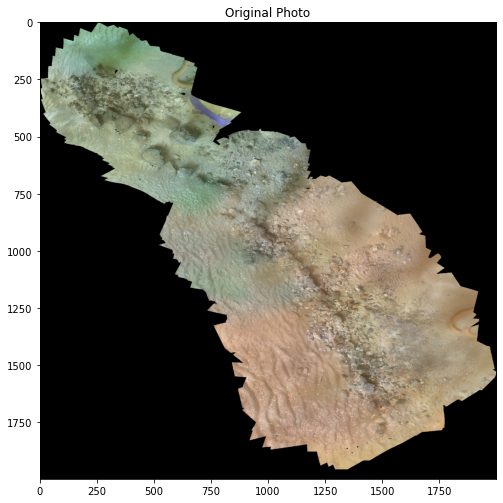

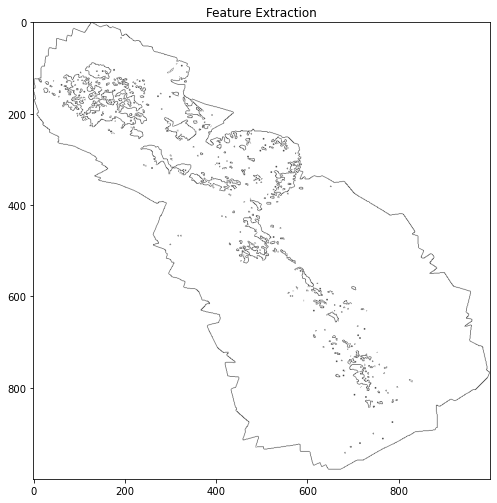

In [87]:
topPlanAutomizer("ortho1.tif")